# Exploring Dandiset 001276: NG-CANCAN Remote Targeting Electroporation

**Important:** This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Use caution when interpreting the code or results.

This notebook explores Dandiset 001276, which contains data from experiments on NG-CANCAN Remote Targeting Electroporation. The experiments investigated the impact of burst number variation on permeabilization distribution in confluent cell monolayers.

You can find this dandiset on [neurosift](https://neurosift.app/dandiset/001276)

## Overview

The notebook will cover the following:

1.  Loading the Dandiset metadata using the DANDI API.
2.  Loading an NWB file from the Dandiset.
3.  Visualizing image data from the NWB file.
4.  Suggesting future directions for analysis.

## Required Packages

The following packages are required to run this notebook:

*   `pynwb`
*   `h5py`
*   `remfile`
*   `matplotlib`
*   `numpy`

## Loading the Dandiset

In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001276")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 108 assets in the dataset

First 5 assets:
- sub-P1-20240627-A2/sub-P1-20240627-A2_obj-fniblx_image.nwb
- sub-P1-20240627-A3/sub-P1-20240627-A3_obj-1h4rh2m_image.nwb
- sub-P1-20240627-A2/sub-P1-20240627-A2_obj-1aoyzxh_image.nwb
- sub-P1-20240627-A3/sub-P1-20240627-A3_obj-k9o87l_image.nwb
- sub-P1-20240627-B1/sub-P1-20240627-B1_obj-1qpzwid_image.nwb


## Loading an NWB file and its metadata

In this section, we will load one of the NWB files from the Dandiset and examine its metadata. We will load the file `sub-P1-20240627-A2/sub-P1-20240627-A2_obj-1aoyzxh_image.nwb`.

Here is how to get the URL for the asset:

```python
asset_id = "95141d7a-82aa-4552-940a-1438a430a0d7"
url = f"https://api.dandiarchive.org/api/assets/{asset_id}/download/"
```

In [2]:
import pynwb
import h5py
import remfile

# Load
url = "https://api.dandiarchive.org/api/assets/95141d7a-82aa-4552-940a-1438a430a0d7/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

nwb.session_description
nwb.identifier
nwb.session_start_time
nwb.experimenter
nwb.lab
nwb.institution

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


'Old Dominion University'

## Loading and visualizing image data

In this section, we will load and visualize some of the image data from the NWB file.

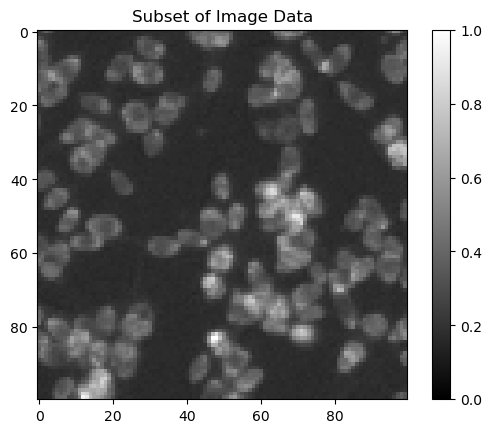

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Get image data
image_data = nwb.acquisition['SingleTimePointImaging'].data

# Extract a subset of the data
subset_size = 100
subset_data = image_data[0, 7000:7000+subset_size, 7000:7000+subset_size]

# Scale the data to the range 0-1
subset_data = subset_data / np.max(subset_data)

# Plot the subset
plt.imshow(subset_data, cmap='gray', vmin=0, vmax=1)
plt.title('Subset of Image Data')
plt.colorbar()
plt.show()

## Summary and future directions

This notebook has shown how to load and visualize data from Dandiset 001276. Possible future directions for analysis include:

*   Segmenting the cells in the images.
*   Quantifying the intensity of the fluorescence signal in the cells.
*   Comparing the results of different electroporation protocols.